<a href="https://colab.research.google.com/github/gunelaliyevaa/wildfire-detection-using-satellite-imagery/blob/main/image_preprocessing_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wildfire Image Preprocessing Demo

This notebook demonstrates how to:
- Enhance them using CLAHE (Contrast Limited Adaptive Histogram Equalization)
- Split them into uniform patches

This is part of a pipeline for wildfire detection using satellite imagery.


### Set up
Clone the repository and install necessary dependencies to get started.

In [12]:
!git clone https://github.com/gunelaliyevaa/wildfire-detection-using-satellite-imagery.git

Cloning into 'wildfire-detection-using-satellite-imagery'...
remote: Enumerating objects: 1075, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1075 (delta 71), reused 45 (delta 36), pack-reused 945 (from 1)
Receiving objects: 100% (1075/1075), 205.56 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (204/204), done.
Updating files: 100% (672/672), done.


Change the working directory to the actual project folder.

In [13]:
%cd /content/wildfire-detection-using-satellite-imagery

/content/wildfire-detection-using-satellite-imagery


In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import lib as lib

Import standard packages like OpenCV for image processing, NumPy for array manipulation, matplotlib for visualization, and custom preprocessing functions from the /content/wildfire-detection-using-satellite-imagery/lib/image_preprocessor.py directory.

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import lib as lib

### Load a Sample Satellite Image

Choose the image to apply CLAHE and patching. Sample images are also available in /content/wildfire-detection-using-satellite-imagery/data/processed directory

In [16]:
# Utility function to display images
def show_image(img, title='', size=(6, 6)):
    plt.figure(figsize=size)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

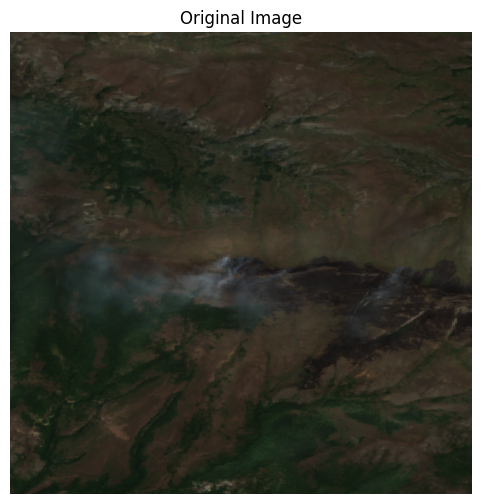

In [19]:
sample_img_path = '/content/wildfire-detection-using-satellite-imagery/data/processed/train/fire/39.7206_46.5644_n.png'

image = cv2.imread(sample_img_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {sample_img_path}")

show_image(image, title='Original Image')


 ### Apply CLAHE Enhancement
 **What is CLAHE?**

CLAHE stands for *Contrast Limited Adaptive Histogram Equalization*. It's a computer vision technique that:

- Works on **small tiles** of the image instead of the whole image at once
- **Boosts local contrast** without over-amplifying noise
- Is especially useful in satellite imagery where lighting varies (e.g., shadows, smoke, haze)

We use CLAHE to make fire-related features (like smoke, burnt terrain) more visible for both humans and machine learning models.


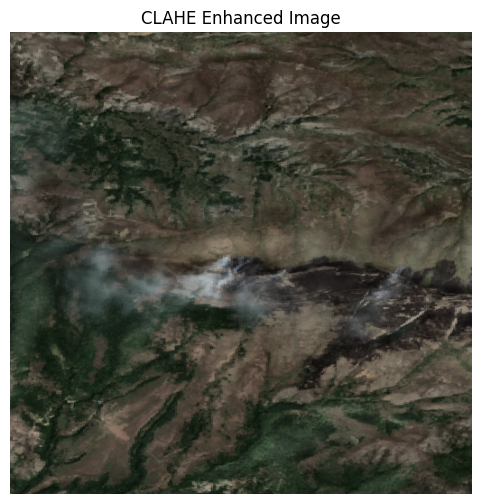

In [20]:
clahe_image = lib.image_preprocessor.apply_clahe_rgb(image)

show_image(clahe_image, title='CLAHE Enhanced Image')

### Split the Enhanced Image into Patches

We split the image into fixed-size patches of 256x256 px. This is useful for training CNNs or segmenting the image for classification.

Only full patches are kept — no partial edge patches.

In [21]:
patches = lib.image_preprocessor.split_into_patches(clahe_image, patch_size=256)
print(f"Total patches created: {len(patches)}")

Total patches created: 4


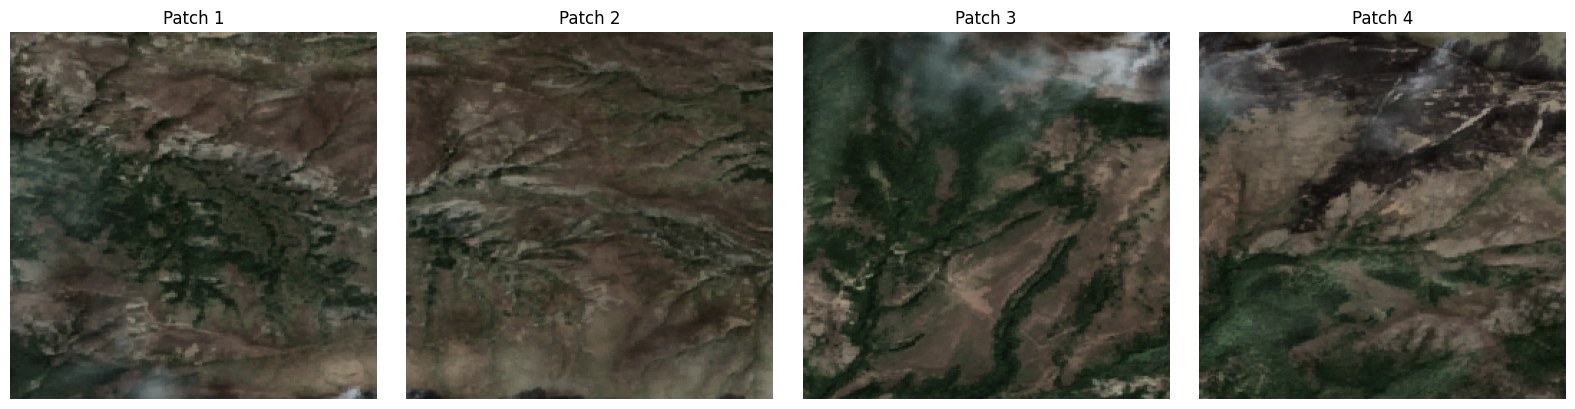

In [22]:
num_patches = len(patches)
plt.figure(figsize=(num_patches * 4, 4))  # Scale width with number of patches

for i in range(num_patches):
    plt.subplot(1, num_patches, i + 1)  # 1 row, N columns
    plt.imshow(cv2.cvtColor(patches[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Patch {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()